In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


1.What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?






In [25]:
#Filtering columns
relevant_columns = ['ROUTE_ABBR', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE', 'HDWY_DEV','SCHEDULED_HDWY']
filtered_data = wego.loc[:, relevant_columns]


In [31]:
ontime_percentage = (wego['ADJUSTED_ONTIME_COUNT'].value_counts(normalize=True) * 100).round(2)

# '%' added
ontime_percentage_formatted = ontime_percentage.map("{:.2f}%".format)

# Results
print("Percentage of ADJUSTED_ONTIME_COUNT values:")
print(ontime_percentage_formatted)

Percentage of ADJUSTED_ONTIME_COUNT values:
ADJUSTED_ONTIME_COUNT
1    77.08%
0    22.92%
Name: proportion, dtype: object


In [47]:
#Uncleaned 
wego['HDWY_DEV_PCT'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']

In [52]:
#Cleaned PCT without inf and NaN's
wego['HDWY_DEV_PCT_C'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']

# Replace inf values with NaN
wego['HDWY_DEV_PCT_C'] = wego['HDWY_DEV_PCT_C'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
wego_cleaned = wego.dropna(subset=['HDWY_DEV_PCT_C'])

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


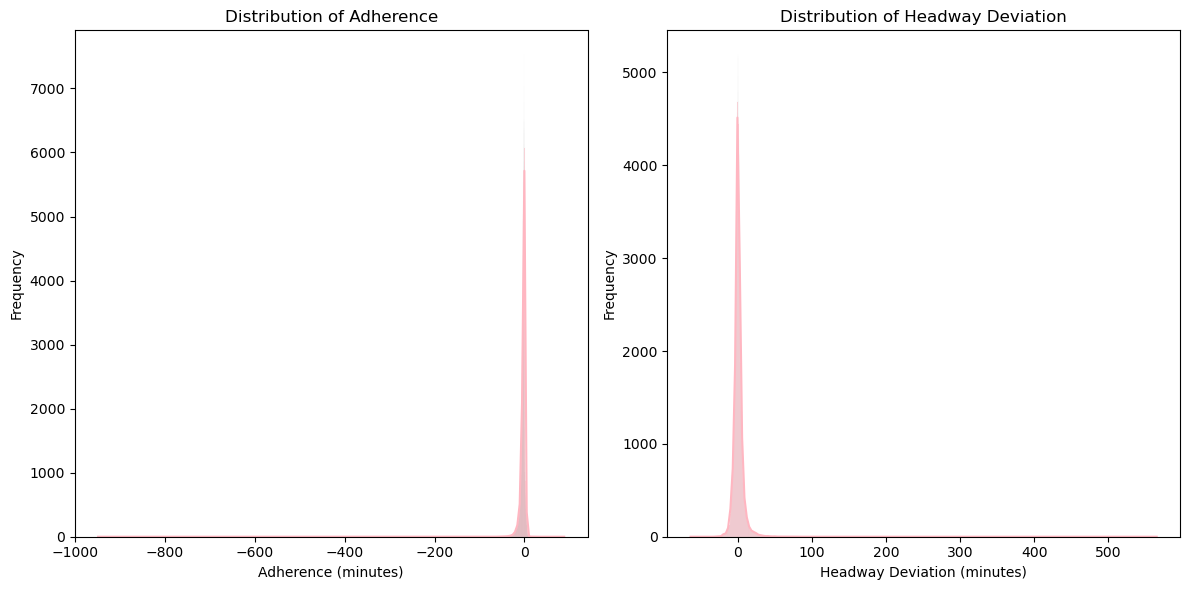

In [7]:
#Plots
plt.figure(figsize=(12, 6))

# Distribution of adherence
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')


# Distribution of headway deviation
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV'], kde=True, color='lightpink')
plt.title('Distribution of Headway Deviation')
plt.xlabel('Headway Deviation (minutes)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


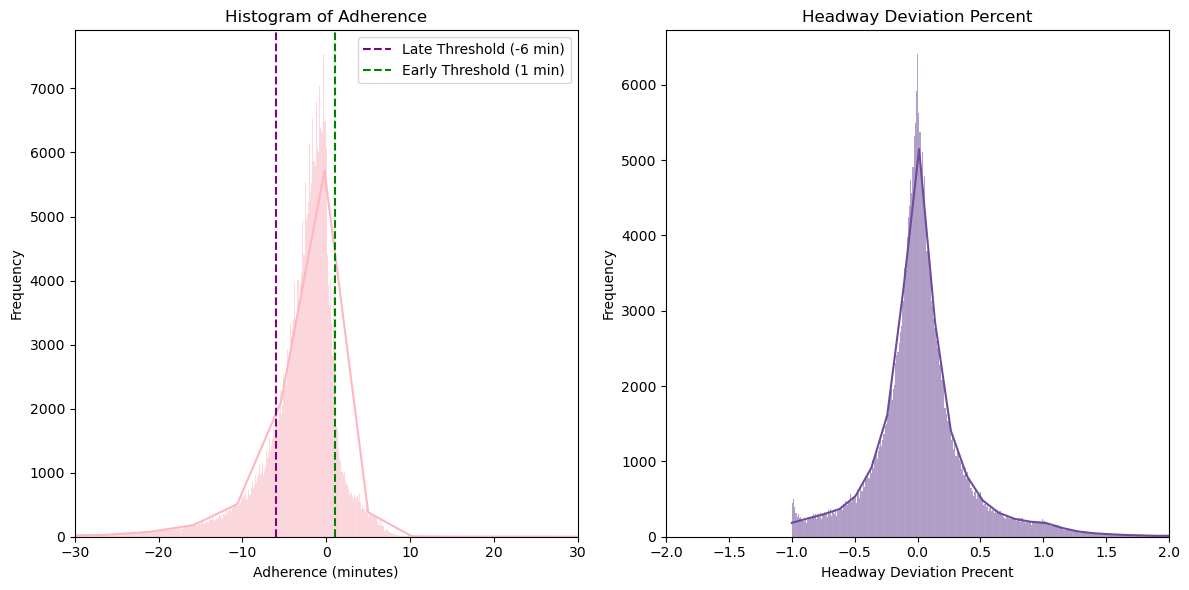

In [62]:
#Histograms with pretty lines
plt.figure(figsize=(12, 6))

#'ADHERENCE'
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

#'HDWY_DEV' 
filtered_data['HDWY_DEV_PCT_C'] = filtered_data['HDWY_DEV'] / filtered_data['SCHEDULED_HDWY']
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV_PCT_C'], kde=True, color='#6F4B9E')
plt.title('Headway Deviation Percent')
plt.xlabel('Headway Deviation Precent')
plt.ylabel('Frequency')
plt.xlim(left=-2, right=2)  


plt.tight_layout()
plt.show()

2. How does direction of travel, route, or location affect the headway and on-time performance?

In [63]:
grouped_abbr = wego.groupby('ROUTE_ABBR')

In [65]:
grouped_route = wego.groupby('ROUTE_DIRECTION_NAME')

In [66]:
statistics = grouped_abbr.agg({'HDWY_DEV_PCT_C': ['mean', 'std'], 'ADJUSTED_ONTIME_COUNT': 'mean'})

In [60]:
statistics

HDWY_DEV_PCT_C           ADJUSTED_ONTIME_COUNT
                     mean       std                  mean
ROUTE_ABBR                                               
3                0.056278  0.694458              0.731860
7                0.021907  0.334272              0.744314
22               0.033891  0.333710              0.866443
23               0.054504  0.450110              0.834450
50               0.012045  0.277422              0.838719
52               0.041635  0.445742              0.728227
55               0.025342  0.520386              0.679323
56               0.013182  0.387492              0.805748

In [67]:
# Group by 'ROUTE_DIRECTION_NAME' & 'ROUTE_ABBR'
grouped_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])

#Stats
statistics = grouped_route.agg({'HDWY_DEV_PCT_C': ['mean', 'std'], 'ADJUSTED_ONTIME_COUNT': 'mean'})

In [68]:
statistics

HDWY_DEV_PCT_C           ADJUSTED_ONTIME_COUNT
                                          mean       std                  mean
ROUTE_ABBR ROUTE_DIRECTION_NAME                                               
3          FROM DOWNTOWN              0.084821  0.926101              0.653150
           TO DOWNTOWN                0.027764  0.325067              0.811033
7          FROM DOWNTOWN              0.021202  0.340510              0.713336
           TO DOWNTOWN                0.022637  0.327726              0.776398
22         FROM DOWNTOWN              0.041202  0.378573              0.822229
           TO DOWNTOWN                0.025774  0.275281              0.913531
23         FROM DOWNTOWN              0.053438  0.454760              0.815242
           TO DOWNTOWN                0.056034  0.443366              0.863433
50         FROM DOWNTOWN              0.011373  0.293693              0.824358
           TO DOWNTOWN                0.012716  0.260155              0.852991
52         FROM DOWNTOWN              0.052448  0.506529              0.645627
           TO DOWNTOWN                0.029981  0.368853              0.817732
55         FROM DOWNTOWN              0.023171  0.553200              0.626135
           TO DOWNTOWN                0.027483  0.485855              0.731642
56         FROM DOWNTOWN              0.014636  0.427116              0.752563
           TO DOWNTOWN                0.011002  0.318996              0.880224